# Birds in conservation 
We'll be briefly uncovering facts about a bird in this notebook by exploring the different conservation categories of the birds of Minnesota

@author - Jimmy Chepkurui 


In [135]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [4,6]

In [13]:
# Exploring data
birds = pd.read_csv('../input/birds-of-minnesota-1/birds.csv')
birds.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


## Conservation Statuses

**Extinct**
    Extinct (EX)
    Extinct in the Wild (EW)

	
    
**Threatened**
    Critically Endangered (CR)
    Endangered (EN)
    Vulnerable (VU)

	

**Lower Risk**
    Near Threatened (NT)
    Conservation Dependent (CD)
    Least Concern (LC)
    
Source: Wikipedia

In [28]:
birds.ConservationStatus.value_counts()

LC    402
NT     27
VU     10
EN      2
EX      1
CR      1
Name: ConservationStatus, dtype: int64

We'll have a look at threatened birds under the Vulnerable category that could soon be at a greater risk

In [48]:
# birds['Name'].value_counts(birds['MinWingspan'].values < 40)
birds[birds['ConservationStatus'].values == 'VU']['Name'].value_counts()

Long-tailed duck              1
Greater prairie-chicken       1
Horned grebe                  1
Chimney swift                 1
Black-legged kittiwake        1
Snowy owl                     1
Sprague's pipit               1
Evening grosbeak              1
Chestnut-collared longspur    1
Rusty blackbird               1
Name: Name, dtype: int64

We select Horned Greb arbitrarily to get some insights

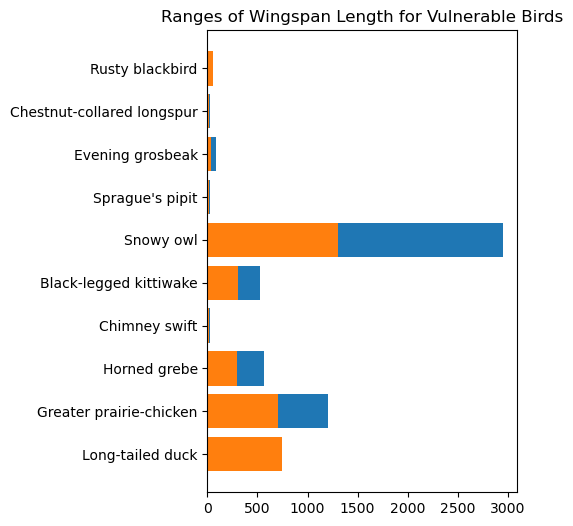

In [136]:
# Comparing birds wingspans

plt.barh('Name', 'MaxBodyMass', data=vulnerable_birds)
plt.barh('Name', 'MinBodyMass', data=vulnerable_birds)
plt.title('Ranges of Wingspan Length for Vulnerable Birds')
plt.show()

There is a considerable difference in the Snowy owl and Horned Grebe

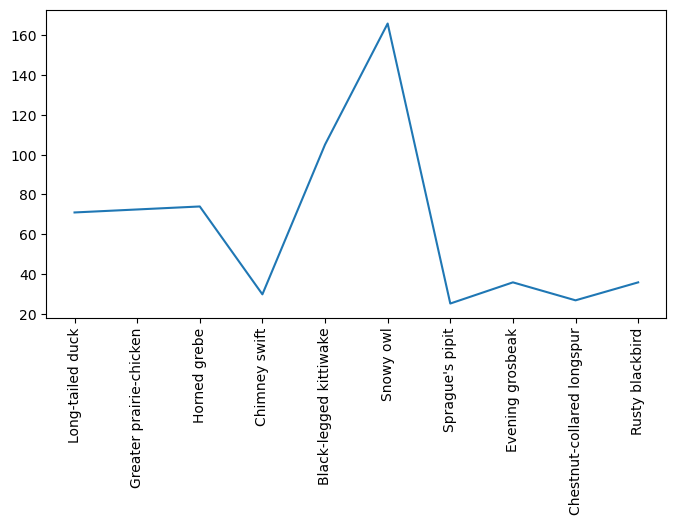

In [140]:
# Comparing bird lengths
plt.rcParams['figure.figsize'] = [8,4]
plt.xticks(rotation=90)
plt.plot('Name','MaxWingspan', data=vulnerable_birds)

The Horned greb has the second highest wingspan length among vulnerable birds

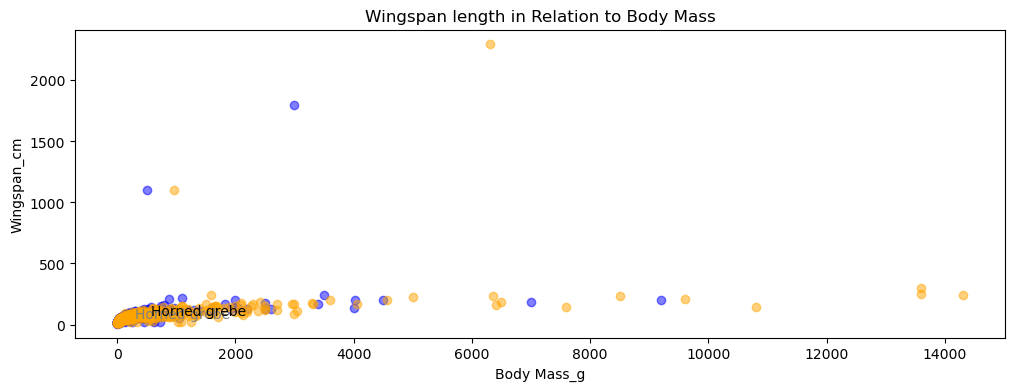

In [143]:
# Checking for correlation between wingspan and body mass
plt.rcParams['figure.figsize'] = [12, 4]
plt.xlabel('Body Mass_g')
plt.ylabel('Wingspan_cm')
plt.plot('MinBodyMass', 'MinWingspan', 'bo', label='Min', alpha=0.5, data=birds)
plt.plot('MaxBodyMass', 'MaxWingspan', 'o', color='orange', alpha=0.5, data=birds)
for index, row in birds.iterrows():
#     plt.plot('MinBodyMass', 'MinWingspan', 'bo', data=row)
#     plt.plot('MaxBodyMass', 'MaxWingspan', 'o', color='orange', data=row)
    if row['Name'] in ['Horned grebe'] :
        plt.text(row['MinBodyMass'], row['MinWingspan'], row['Name'], color='grey')
        plt.text(row['MaxBodyMass'], row['MaxWingspan'], row['Name'], color='black')
plt.title('Wingspan length in Relation to Body Mass')
plt.show()

Body mass does not affect the bird's wingspan length when it's small

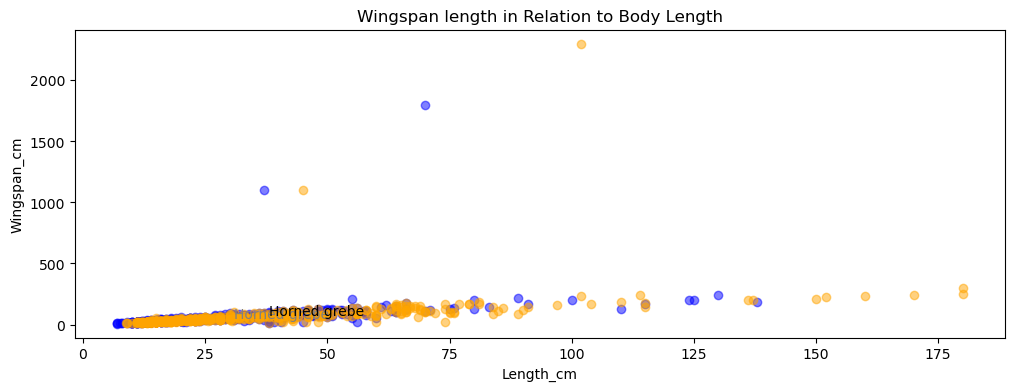

In [146]:
# Checking for correlation between wingspan and body mass
plt.rcParams['figure.figsize'] = [12, 4]
plt.xlabel('Length_cm')
plt.ylabel('Wingspan_cm')
plt.plot('MinLength', 'MinWingspan', 'bo', label='Min', alpha=0.5, data=birds)
plt.plot('MaxLength', 'MaxWingspan', 'o', color='orange', label='Max',alpha=0.5, data=birds)
for index, row in birds.iterrows():
#     plt.plot('MinBodyMass', 'MinWingspan', 'bo', data=row)
#     plt.plot('MaxBodyMass', 'MaxWingspan', 'o', color='orange', data=row)
    if row['Name'] in ['Horned grebe'] :
        plt.text(row['MinLength'], row['MinWingspan'], row['Name'], color='grey')
        plt.text(row['MaxLength'], row['MaxWingspan'], row['Name'], color='black')
plt.title('Wingspan length in Relation to Body Length')
plt.show()

On inspection, it is clear that the bird's wingspan is slightly affected by it's body length as it grows  